## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
✅ Di setiap visualisasi, penjelasan (insight) yang Anda sampaikan sebaiknya yang berhubungan dengan keuntungan/kerugian perusahaan real estate atau manfaat ke konsumen.

## Data

In [3]:
df=pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
df.isna().sum() # lihat data yang kosong

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
df = df.dropna()
df.isna().sum() # drop data kosong dan di store ke data baru

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [9]:
df.info() # jenis data ada apa saja

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

In [10]:
df.describe() # lihat jenis data

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [14]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


## Detil Variabel

Notes on Specific Variables
Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

## Soal

## 1. Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:

- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)

## 1.1 Titik Pusat Data (Central Tendency)

In [45]:
## Landsize

print('Availability Rata-Rata Landsize      :', df['Landsize'].mean())
print('Median Availability Rumah            :', df['Landsize'].median())
print('Landsize yang paling sering muncul   :', df['Landsize'].mode())

# dari data ini bisa diasumsikan bahwa data Landsize memiliki skew positif karena rata-ratanya lebih besar daripada median dan mode nya lebih kecil dari median

Availability Rata-Rata Landsize      : 471.00693996126535
Median Availability Rumah            : 373.0
Landsize yang paling sering muncul   : 0    0.0
dtype: float64
dari data ini bisa diasumsikan bahwa data Landsize memiliki skew positif karena rata-ratanya lebih besar daripada median dan mode nya lebih kecil dari median


In [44]:
## Price

print('Harga Rata-Rata Landsize                 :', df['Price'].mean())
print('Harga Median Rumah                       :', df['Price'].median())
print('Harga Landsize yang paling sering muncul :', df['Price'].mode())

# dari data ini bisa diasumsikan bahwa data Price memiliki skew positif karena rata-ratanya lebih besar daripada median dan mode nya lebih kecil dari median

Harga Rata-Rata Landsize                 : 1068828.202065849
Harga Median Rumah                       : 880000.0
Harga Landsize yang paling sering muncul : 0    600000.0
dtype: float64


## 1.2 Persebaran Data (Dispersion)

In [38]:
## Landsize
print('Persebaran variance Landsize:', df['Landsize'].var())
print('Standard Deviasi Landsize:', df['Landsize'].std())

# dari temuan ini bisa disimpulkan persebaran data Landsize cukup banyak tapi dekat satu sama lain apabila diihat dari standard deviasinya apabila diihat dari standard deviasinya

Persebaran variance Landsize: 805416.2880874233
Standard Deviasi Landsize: 897.4498805434337


In [39]:
## Price
print('Persebaran variance Price:', df['Price'].var())
print('Standard Deviasi Price:', df['Price'].std())

# dari temuan ini bisa disimpulkan persebaran data Prize dan jauh lebih bervariasi dibanding data landsize apabila diihat dari standard deviasinya

Persebaran variance Price: 455836201596.7061
Standard Deviasi Price: 675156.4275015873


## 1.3 Distribusi Data (Distribution)

## Landsize


In [48]:
print('Hasil normal test data Landsize      :',stats.normaltest(df['Landsize'].dropna()))
print('Hasil skew point dari data Landsize  :',stats.skew(df['Landsize'].dropna()))

Hasil normal test data Landsize      : NormaltestResult(statistic=13309.56639382275, pvalue=0.0)
Hasil skew point dari data Landsize  : 18.834378556740738


Dari data di atas bisa disimpulkan bahwa data landsize tidak normal dan memiliki skew point yang sangat tinggi karena hasil skewnya lebih dari 2.

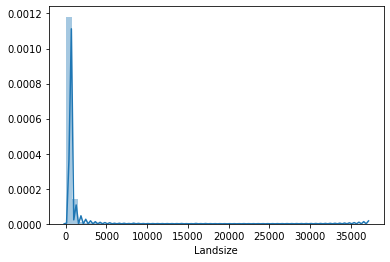

In [31]:
sns.distplot(df['Landsize'])

Ternyata kesimpulan berdasarkan normal test dan tendency test benar.

## Price

In [50]:
print('Hasil normal test data Price      :',stats.normaltest(df['Price'].dropna()))
print('Hasil skew point dari data Price  :',stats.skew(df['Price'].dropna()))

Hasil normal test data Price      : NormaltestResult(statistic=3522.3809188140385, pvalue=0.0)
Hasil skew point dari data Price  : 2.4747899470275407


Dari data di atas bisa disimpulkan bahwa data Price tidak normal dan memiliki skew point yang tinggi karena hasil skewnya lebih dari 2 walau tidak sebesar data Landsize.

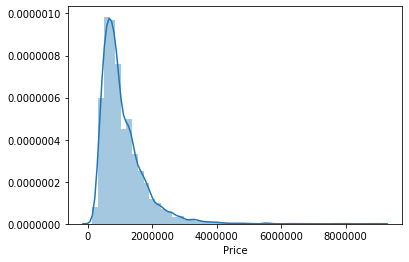

In [37]:
sns.distplot(df['Price'])

In [ ]:
Ternyata kesimpulan berdasarkan normal test dan tendency test benar.

## 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [56]:
def outlier(data):
    x = []
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')  
    Q2 = np.percentile(data, 50, interpolation = 'midpoint')  
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1  
    fence_low = Q1 - (1.5*IQR)
    fence_high = Q3 + (1.5*IQR) 

    print(f'Batas Bawah: {fence_low}')
    print(f'Q1: {Q1}')
    print(f'Q2: {Q2}')
    print(f'Q3: {Q3}')
    print(f'Batas Atas: {fence_high}')

    for outliers in data:
        if outliers < fence_low or outliers > fence_high:
            x.append(outliers)
    return x

print(len(outlier(df['Distance'].dropna())))

Batas Bawah: -3.8499999999999996
Q1: 5.9
Q2: 9.0
Q3: 12.4
Batas Atas: 22.15
204


In [ ]:
Di atas, saya gunakan fungsi untuk mencari Batas Atas, Batas Bawah dan Berapa jumlah outlier yang ada di data distance. 

Bisa disimpulkan bahwa 68% rumah yang dijual berbanding dengan jarak CBD umumnya ada di antara 5.9 - 12.4. Apabila ingin mencari rumah, maka kemungkinan besar akan bertemu rumah dengan lokasi di jarak antara 5.9-12.4 dari CBD.

Akan tetapi masih ada 204 lokasi yang letaknya di atas 22.15 km. Berikut visualisasi data tadi.

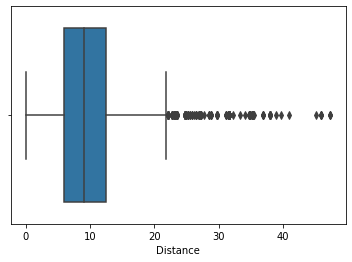

In [57]:
sns.boxplot(x='Distance',data=df)

## 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

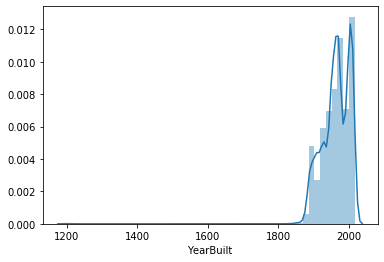

In [61]:
sns.distplot(df['YearBuilt'])

Menggunakan distplot, kita dapat melihat meskipun di area tersebut ada rumah yang dibangun dari tahun 1200-an, akan tetapi pada umumnya rumah yang masih berdiri dibuat sekitar tahun 1900-an. Yang dimana jumlah rumah yang umumnya ada dibuat di sekitar taun 1960-an dan 1990-an.

maka dari itu kemungkinan besar kita akan lebih sering bertemu dengan rumah yang kira-kira berdiri dari tahun 1960-an dan 1990-an

## 4. Tampilkan perkembangan rata-rata harga (Price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

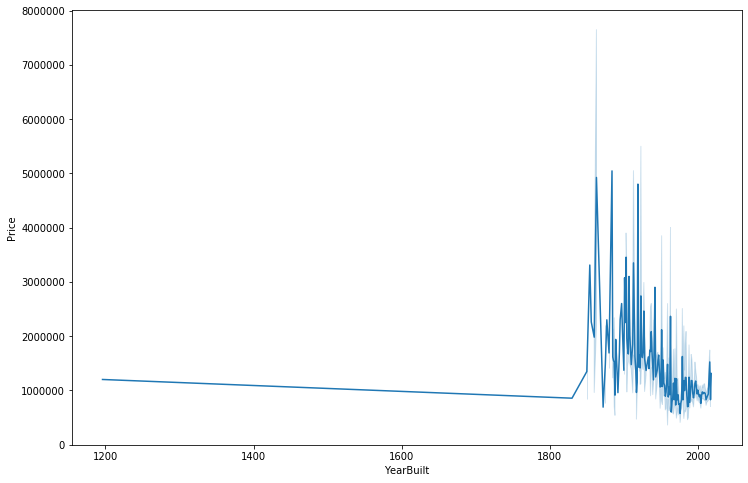

In [65]:
plt.figure(figsize=(12,8))
sns.lineplot(x='YearBuilt', y= 'Price' ,data=df)

berdasarkan data di atas, dapat disimpulkan bahwa data harga rumah sangat fluktuatif dan terlihat bahwa rumah yang dibangun sekitar tahun 1900-an mempunyai harga yang lebih mahal dibanding rumah yang dibuat pada tahun 2000-an.

## 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [68]:
print('Hasil normal test data Landsize   :',stats.normaltest(df['Landsize'].dropna()))
print('Hasil normal test data Distance   :',stats.normaltest(df['Distance'].dropna()))
print('Hasil normal test data Rooms      :',stats.normaltest(df['Rooms'].dropna()))
print('Hasil normal test data Price      :',stats.normaltest(df['Price'].dropna()))

Hasil normal test data Landsize   : NormaltestResult(statistic=13309.56639382275, pvalue=0.0)
Hasil normal test data Distance   : NormaltestResult(statistic=2376.577754887771, pvalue=0.0)
Hasil normal test data Rooms      : NormaltestResult(statistic=139.54392596422878, pvalue=4.993688927652792e-31)
Hasil normal test data Price      : NormaltestResult(statistic=3522.3809188140385, pvalue=0.0)


Pertama kita gunakan normal test untuk melihat apakah data dari 4 variabel tersebut normal dan berdasarkan normal test dapat disimpulkan bahwa semua data tersebut tidak memiliki distribusi normal. Maka dari itu, metode Pearson tidak bisa diaplikasikan dan lebih cocok menggunakan metode Spearman yang didesign untuk menghitung korelasi data tidak normal

In [73]:
df_heatmap = df[['Landsize', 'Distance', 'Rooms', 'Price']].corr(method='spearman')
df_heatmap # kita ambil variabel data yang relevan

,Landsize,Distance,Rooms,Price
Landsize,1.000000,0.408084,0.522214,0.365473
Distance,0.408084,1.000000,0.336033,-0.117274
Rooms,0.522214,0.336033,1.000000,0.591448
Price,0.365473,-0.117274,0.591448,1.000000


In [75]:
mask = np.zeros_like(df_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True # kita gunakan mask agar rapi

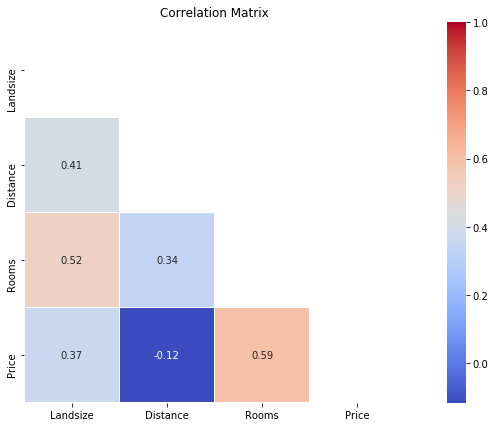

In [76]:
plt.figure(figsize=(15,7))

sns.heatmap(
    df_heatmap,
    mask = mask,
    square=True,
    linewidths= .5,
    cmap= 'coolwarm',
    annot= True
)

plt.title('Correlation Matrix', size=12)
plt.show()

In [ ]:
Berdasarkan heatmap yang ditampilkan, dapat disimpulkan bahwa:
- Rooms dan Price memiliki korelasi lemah karena * +/- 0.4 - 0.6 = Korelasi lemah
- Distance dan Landprice memiliki korelasi lemah karena * +/- 0.4 - 0.6 = Korelasi lemah
sedangkan sisanya bisa dianggap tidak memiliki korelasi sama sekali

In [ ]:
## 6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:

Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!
Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
Metode penjualan properti (Method) yang paling sering dilakukan!

In [82]:
df.groupby('Regionname')['Price'].mean().sort_values(ascending=False).head().reset_index()

,Regionname,Price
0,Southern Metropolitan,1.378654e+06
1,Eastern Metropolitan,1.110341e+06
2,South-Eastern Metropolitan,9.304847e+05
3,Northern Metropolitan,8.722635e+05
4,Western Metropolitan,8.675011e+05


In [ ]:
Dari data di atas bisa disimpulkan region yang paling mahal 5 adalah southern, eastern, south-eastern, northern, western metropolitan.

In [97]:
df.groupby('Type')['Price'].mean().sort_values(ascending=False).head().reset_index()

,Type,Price
0,h,1.273016e+06
1,t,8.841816e+05
2,u,5.883745e+05


In [101]:
df.groupby('Method')['Address'].count().sort_values(ascending=False).head(1)

Method
S    3957
Name: Address, dtype: int64

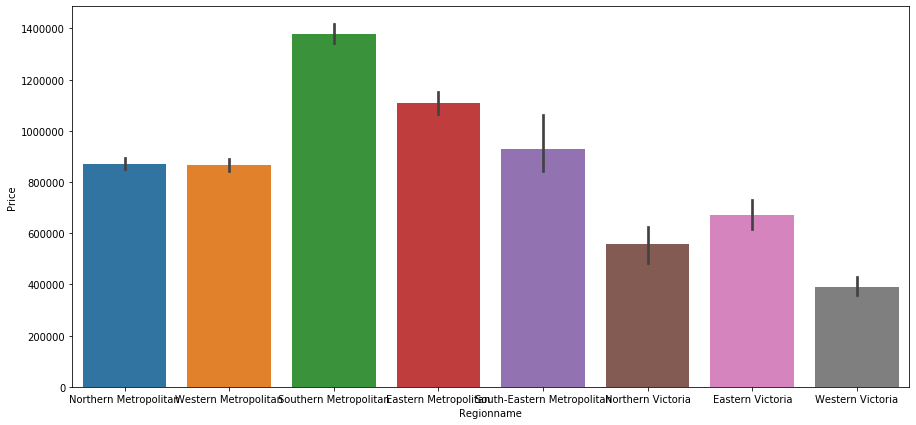

In [83]:
plt.figure(figsize=(15,7)
sns.barplot(x='Regionname', y= 'Price', data=df)

In [ ]:
7. Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name! (Anggap Price memiliki distribusi normal)

In [85]:
df.groupby('Regionname')['Price'].mean().sort_values(ascending=False).reset_index()


,Regionname,Price
0,Southern Metropolitan,1.378654e+06
1,Eastern Metropolitan,1.110341e+06
2,South-Eastern Metropolitan,9.304847e+05
3,Northern Metropolitan,8.722635e+05
4,Western Metropolitan,8.675011e+05
5,Eastern Victoria,6.699992e+05
6,Northern Victoria,5.568947e+05
7,Western Victoria,3.910714e+05


In [96]:
stats.f_oneway(
    df[df['Regionname']=='Southern Metropolitan']['Price'].var(),
    df[df['Regionname']=='Eastern Metropolitan']['Price'].var(),
    df[df['Regionname']=='South-Eastern Metropolitan']['Price'].var(),
    df[df['Regionname']=='Northern Metropolitan']['Price'].var(),
    df[df['Regionname']=='Western Metropolitan']['Price'].var(),
    df[df['Regionname']=='Eastern Victoria']['Price'].var(),
    df[df['Regionname']=='Northern Victoria']['Price'].var(),
    df[df['Regionname']=='Western Victoria']['Price'].var()
)

ValueError: zero-dimensional arrays cannot be concatenated

In [91]:
df[df['Regionname']=='Western Victoria']['Price'].var()

4978956043.956044